In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score

In [ ]:
df=pd.read_excel('/content/Date-Wise-Prices-all-Commodity.xlsx')
df

,diffgr:id,msdata:rowOrder,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Table1,0,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 1,FAQ,24/02/2023,4000,4100.0,4000.0
1,Table2,1,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,24/02/2023,3000,3500.0,3500.0
2,Table3,2,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 3,FAQ,24/02/2023,2300,2300.0,2300.0
3,Table4,3,Andhra Pradesh,Chittor,Punganur,Tomato,Hybrid,FAQ,24/02/2023,1340,2000.0,1670.0
4,Table5,4,Andhra Pradesh,Chittor,Vayalapadu,Tomato,Local,FAQ,24/02/2023,640,2160.0,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,Table6431,6430,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,FAQ,24/02/2023,1400,1500.0,1450.0
6431,Table6432,6431,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Potato,Jyoti,FAQ,24/02/2023,760,800.0,780.0
6432,Table6433,6432,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Rice,Common,FAQ,24/02/2023,2700,2900.0,2800.0
6433,Table6434,6433,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Rice,Super Fine,FAQ,24/02/2023,4700,4900.0,4800.0


In [ ]:
df.head()

,diffgr:id,msdata:rowOrder,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Table1,0,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 1,FAQ,24/02/2023,4000,4100.0,4000.0
1,Table2,1,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,24/02/2023,3000,3500.0,3500.0
2,Table3,2,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 3,FAQ,24/02/2023,2300,2300.0,2300.0
3,Table4,3,Andhra Pradesh,Chittor,Punganur,Tomato,Hybrid,FAQ,24/02/2023,1340,2000.0,1670.0
4,Table5,4,Andhra Pradesh,Chittor,Vayalapadu,Tomato,Local,FAQ,24/02/2023,640,2160.0,1400.0


In [ ]:
df.tail()

,diffgr:id,msdata:rowOrder,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
6430,Table6431,6430,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Onion,Red,FAQ,24/02/2023,1400,1500.0,1450.0
6431,Table6432,6431,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Potato,Jyoti,FAQ,24/02/2023,760,800.0,780.0
6432,Table6433,6432,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Rice,Common,FAQ,24/02/2023,2700,2900.0,2800.0
6433,Table6434,6433,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Rice,Super Fine,FAQ,24/02/2023,4700,4900.0,4800.0
6434,Table6435,6434,West Bengal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),Tomato,Tomato,FAQ,24/02/2023,1400,1600.0,1500.0


In [ ]:
df.columns

Index(['diffgr:id', 'msdata:rowOrder', 'State', 'District', 'Market',
       'Commodity', 'Variety', 'Grade', 'Arrival_Date', 'Min_x0020_Price',
       'Max_x0020_Price', 'Modal_x0020_Price'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
diffgr:id,0
msdata:rowOrder,0
State,0
District,0
Market,0
Commodity,0
Variety,0
Grade,0
Arrival_Date,0
Min_x0020_Price,0


In [ ]:
df.dtypes

,0
diffgr:id,object
msdata:rowOrder,int64
State,object
District,object
Market,object
Commodity,object
Variety,object
Grade,object
Arrival_Date,object
Min_x0020_Price,int64


In [ ]:
df.describe()

,msdata:rowOrder,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
count,6435.000000,6435.000000,6435.000000,6435.000000
mean,3217.000000,4107.969231,4676.000738,4415.979705
std,1857.768823,20324.137126,23998.000980,22159.552059
min,0.000000,0.000000,0.000000,3.000000
25%,1608.500000,1200.000000,1420.000000,1300.000000
50%,3217.000000,2300.000000,2600.000000,2500.000000
75%,4825.500000,4400.000000,5000.000000,4607.500000
max,6434.000000,800000.000000,1000000.000000,900000.000000


In [ ]:
df.info()  # method in pandas is used to get a quick summary of the DataFrame, providing useful information about its structure and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diffgr:id          6435 non-null   object 
 1   msdata:rowOrder    6435 non-null   int64  
 2   State              6435 non-null   object 
 3   District           6435 non-null   object 
 4   Market             6435 non-null   object 
 5   Commodity          6435 non-null   object 
 6   Variety            6435 non-null   object 
 7   Grade              6435 non-null   object 
 8   Arrival_Date       6435 non-null   object 
 9   Min_x0020_Price    6435 non-null   int64  
 10  Max_x0020_Price    6435 non-null   float64
 11  Modal_x0020_Price  6435 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 603.4+ KB


In [ ]:
num = df.select_dtypes(include='number').columns
num = ['Min_x0020_Price','Max_x0020_Price', 'Modal_x0020_Price']

# 1. num = df.select_dtypes(include='number').columns
# This line performs the following:

# df.select_dtypes(include='number'): Filters the columns in the DataFrame df to include only those with numeric data types (int, float, etc.).
# .columns: Extracts the column names from the filtered DataFrame as an Index object.
# Result: The variable num now contains a list of column names (Index object) that represent numeric columns in the DataFrame.
# 2. num = ['Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price']
# This line assigns a new list of column names directly to the num variable. These column names might represent specific numeric fields in the DataFrame. By doing this, the initial filtering from the first line is overridden, and num now explicitly contains the list of column names provided in the assignment.

# Why Combine These Steps?
# The first line dynamically identifies numeric columns, while the second line hardcodes specific column names. This could indicate:

# The developer originally filtered numeric columns dynamically (select_dtypes(include='number')) but later decided to focus on specific numeric columns ('Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price').


Column : Min_x0020_Price
Lower Bound : -3600.0, Upper Bound : 9200.0


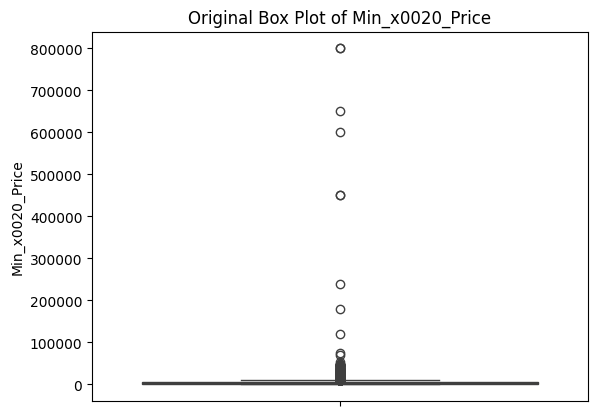

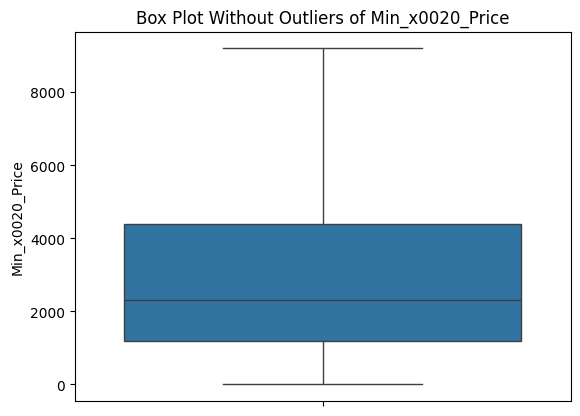

Column : Max_x0020_Price
Lower Bound : -3950.0, Upper Bound : 10370.0


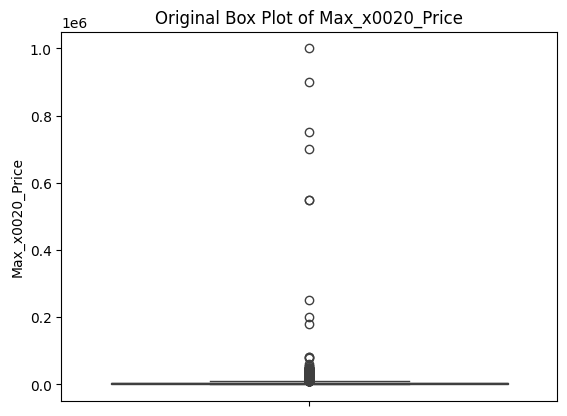

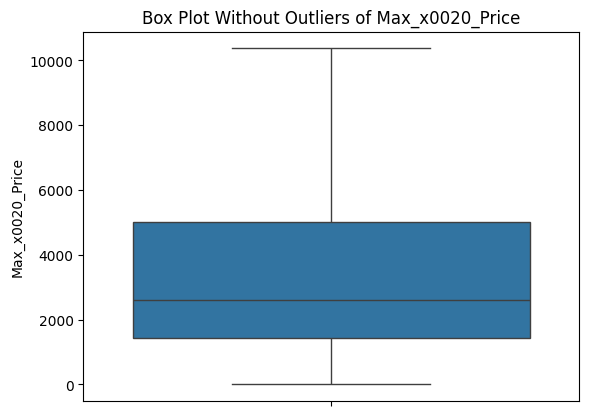

Column : Modal_x0020_Price
Lower Bound : -3661.25, Upper Bound : 9568.75


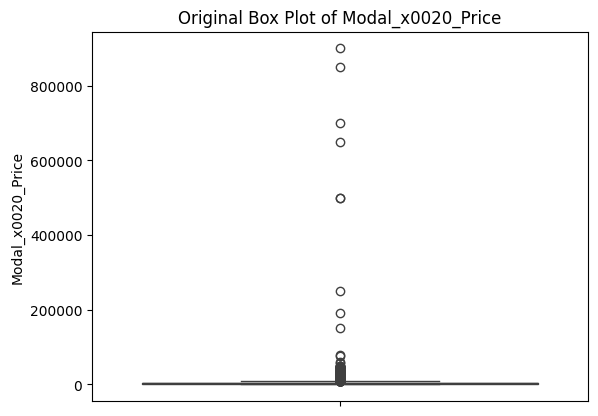

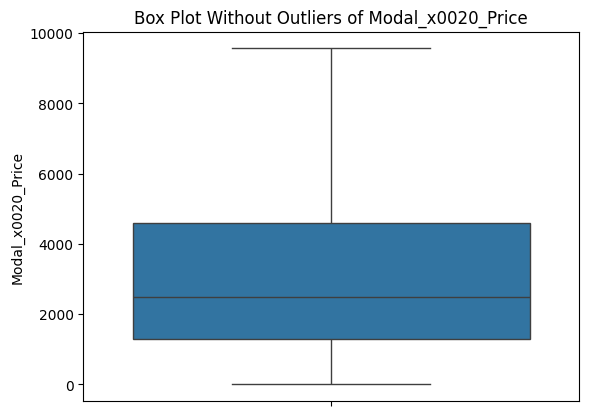

In [ ]:
def outliers_cleaning(clms):
  for column in clms:
    Q1 = np.percentile(df[column],25)
    Q3 = np.percentile(df[column],75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Column : {column}")
    print(f"Lower Bound : {lower_bound}, Upper Bound : {upper_bound}")
    sns.boxplot(y=df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    sns.boxplot(y=df[column])
    plt.title(f'Box Plot Without Outliers of {column}')
    plt.show()

outliers_cleaning(num)


# The code defines a function, outliers_cleaning, that removes outliers from the specified columns of a DataFrame (df) using the Interquartile Range (IQR) method. Let's break it down step by step.

# 1. Function Definition
# def outliers_cleaning(clms):
# The function takes one parameter, clms, which is expected to be a list of column names.

# 2. Loop Through Columns
# for column in clms:
# The function iterates over each column name in the clms list.

# 3. Calculate IQR and Bounds
# Q1 = np.percentile(df[column], 25)
# Q3 = np.percentile(df[column], 75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# For the current column:

# Q1: 25th percentile (first quartile).
# Q3: 75th percentile (third quartile).
# IQR: The interquartile range, Q3 - Q1, measures the spread of the middle 50% of the data.
# lower_bound: The lower limit for non-outlier values (Q1 - 1.5 * IQR).
# upper_bound: The upper limit for non-outlier values (Q3 + 1.5 * IQR).

# 4. Display Column Info
# print(f"Column : {column}")
# print(f"Lower Bound : {lower_bound}, Upper Bound : {upper_bound}")
# Prints the name of the column and its calculated lower and upper bounds for identifying outliers.

# 5. Plot Original Box Plot
# sns.boxplot(y=df[column])
# plt.title(f'Original Box Plot of {column}')
# plt.show()
# Creates and displays a box plot of the current column using seaborn (sns).
# The box plot visually shows the distribution, including outliers (as points outside the whiskers).

# 6. Cap Outliers
# df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
# df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
# Uses NumPy's np.where function to replace:
# Values below lower_bound with lower_bound.
# Values above upper_bound with upper_bound.
# This effectively "caps" the outliers, bringing them within the defined range.

# 7. Plot Box Plot After Outlier Removal
# sns.boxplot(y=df[column])
# plt.title(f'Box Plot Without Outliers of {column}')
# plt.show()
# Displays another box plot for the column after capping the outliers, allowing for a visual comparison of the changes.

# 8. Function Call
# outliers_cleaning(num)
# Calls the function with the num list, which contains the numeric columns (['Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price']).

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
obj = x.select_dtypes(include='object').columns

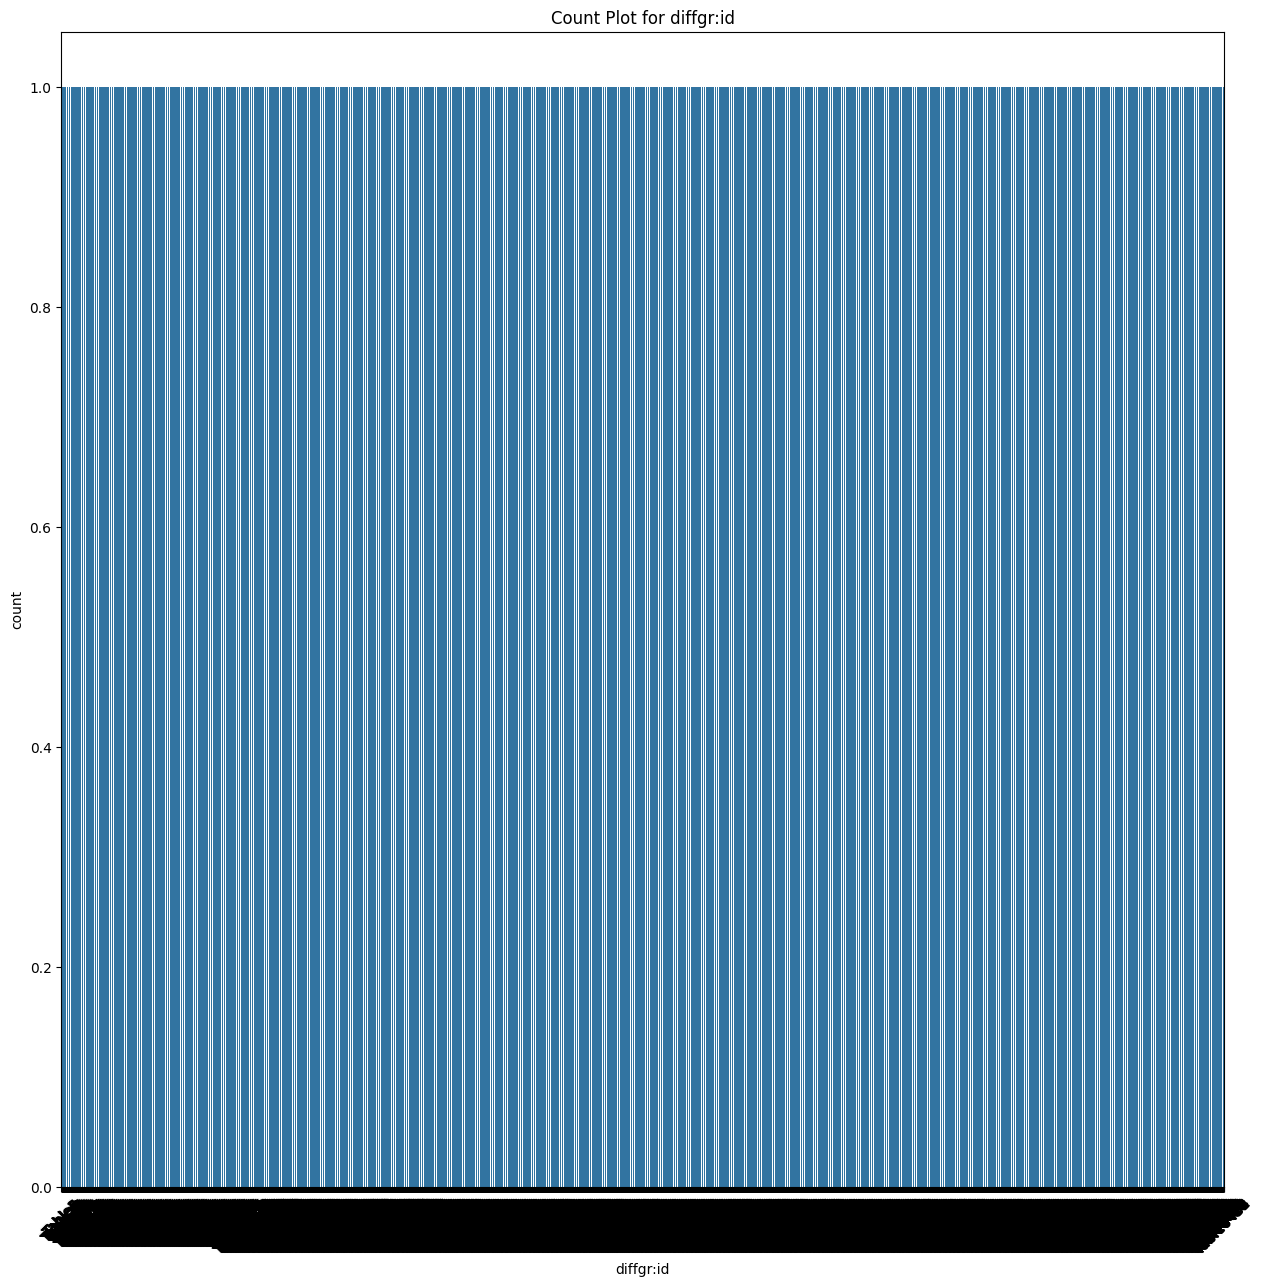

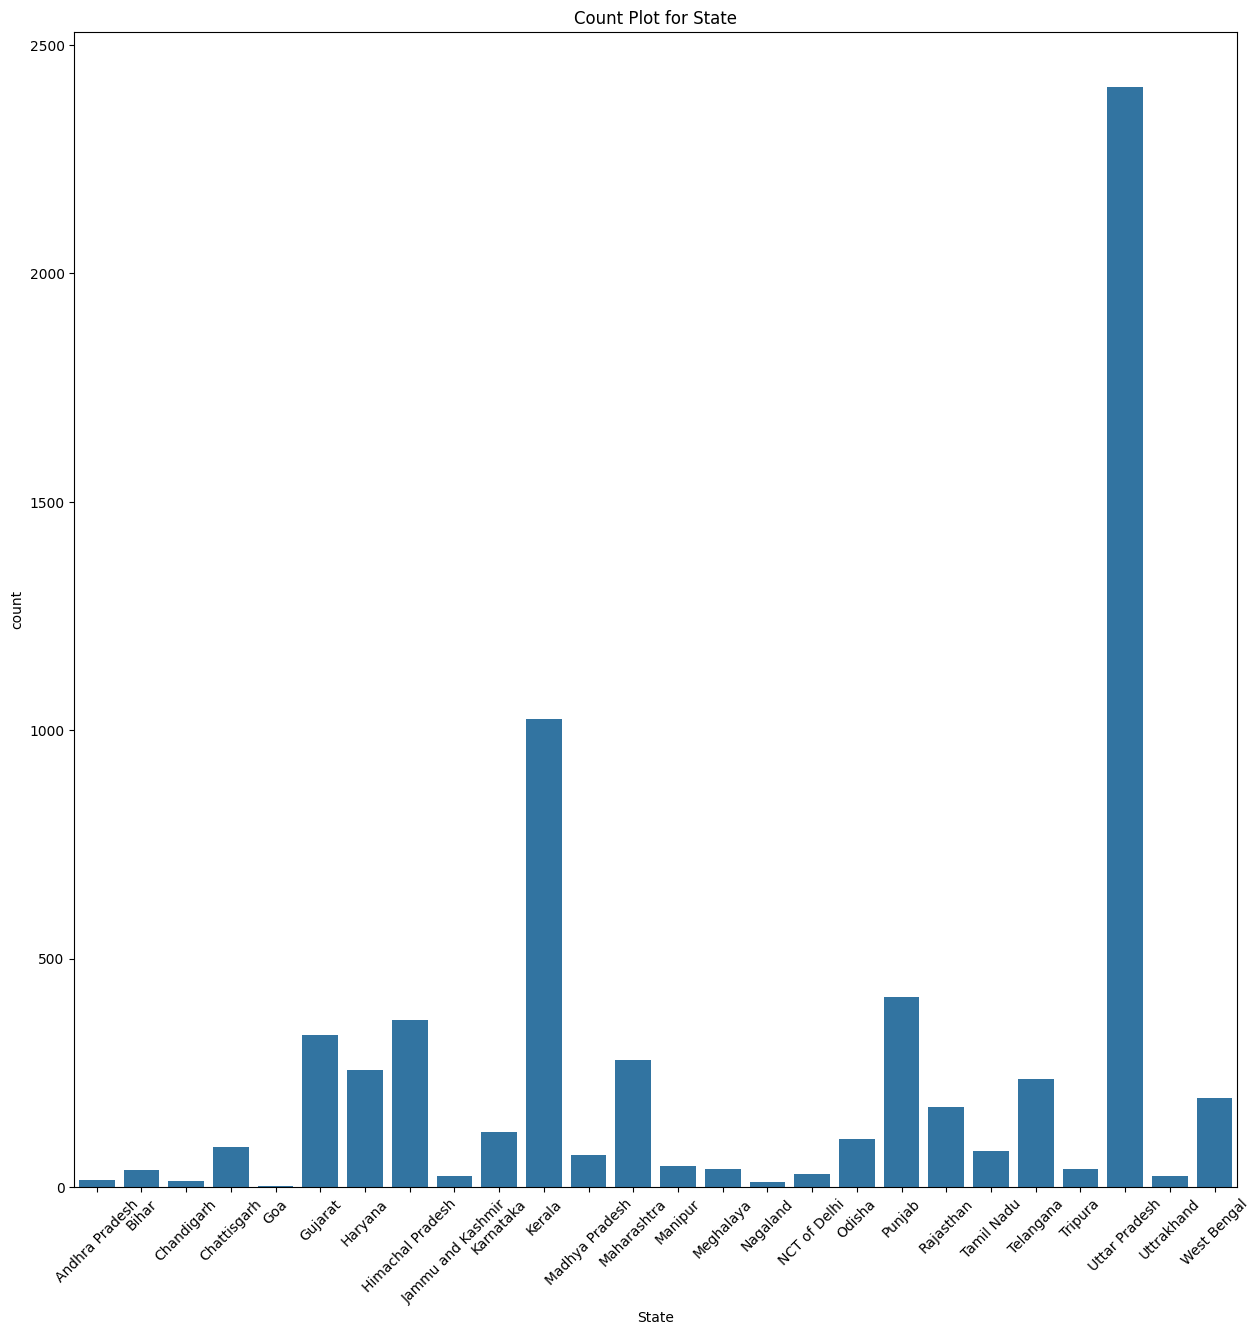

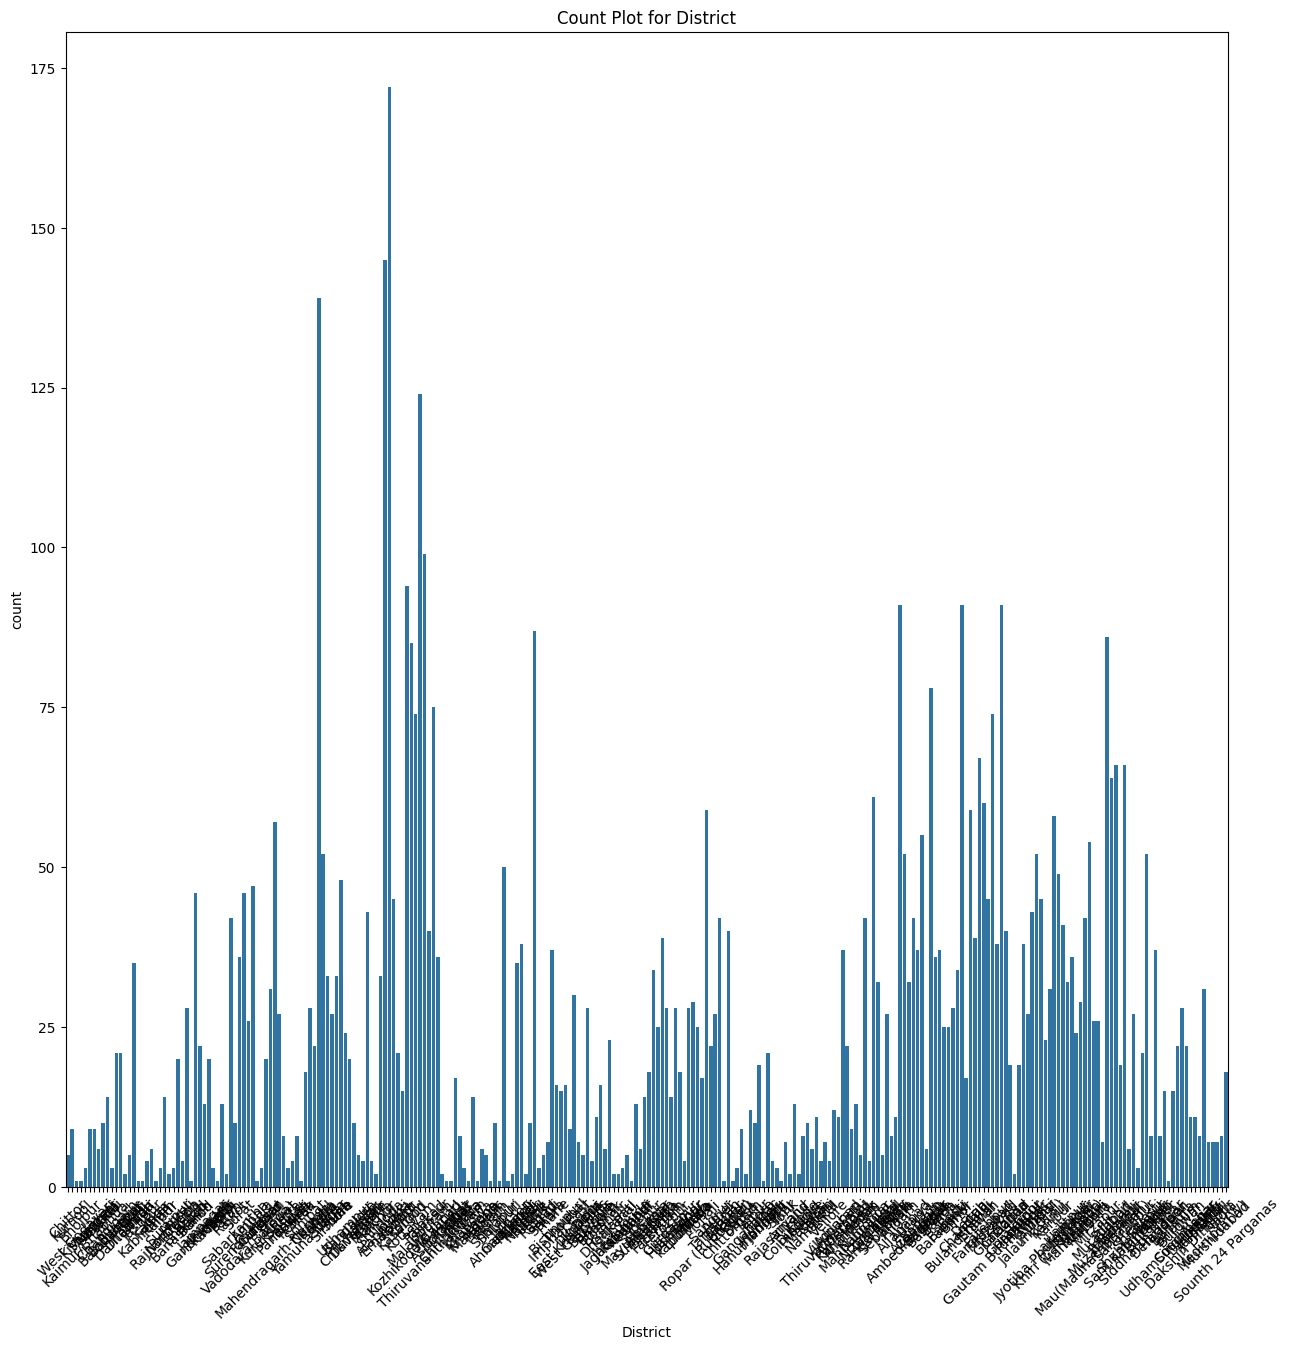

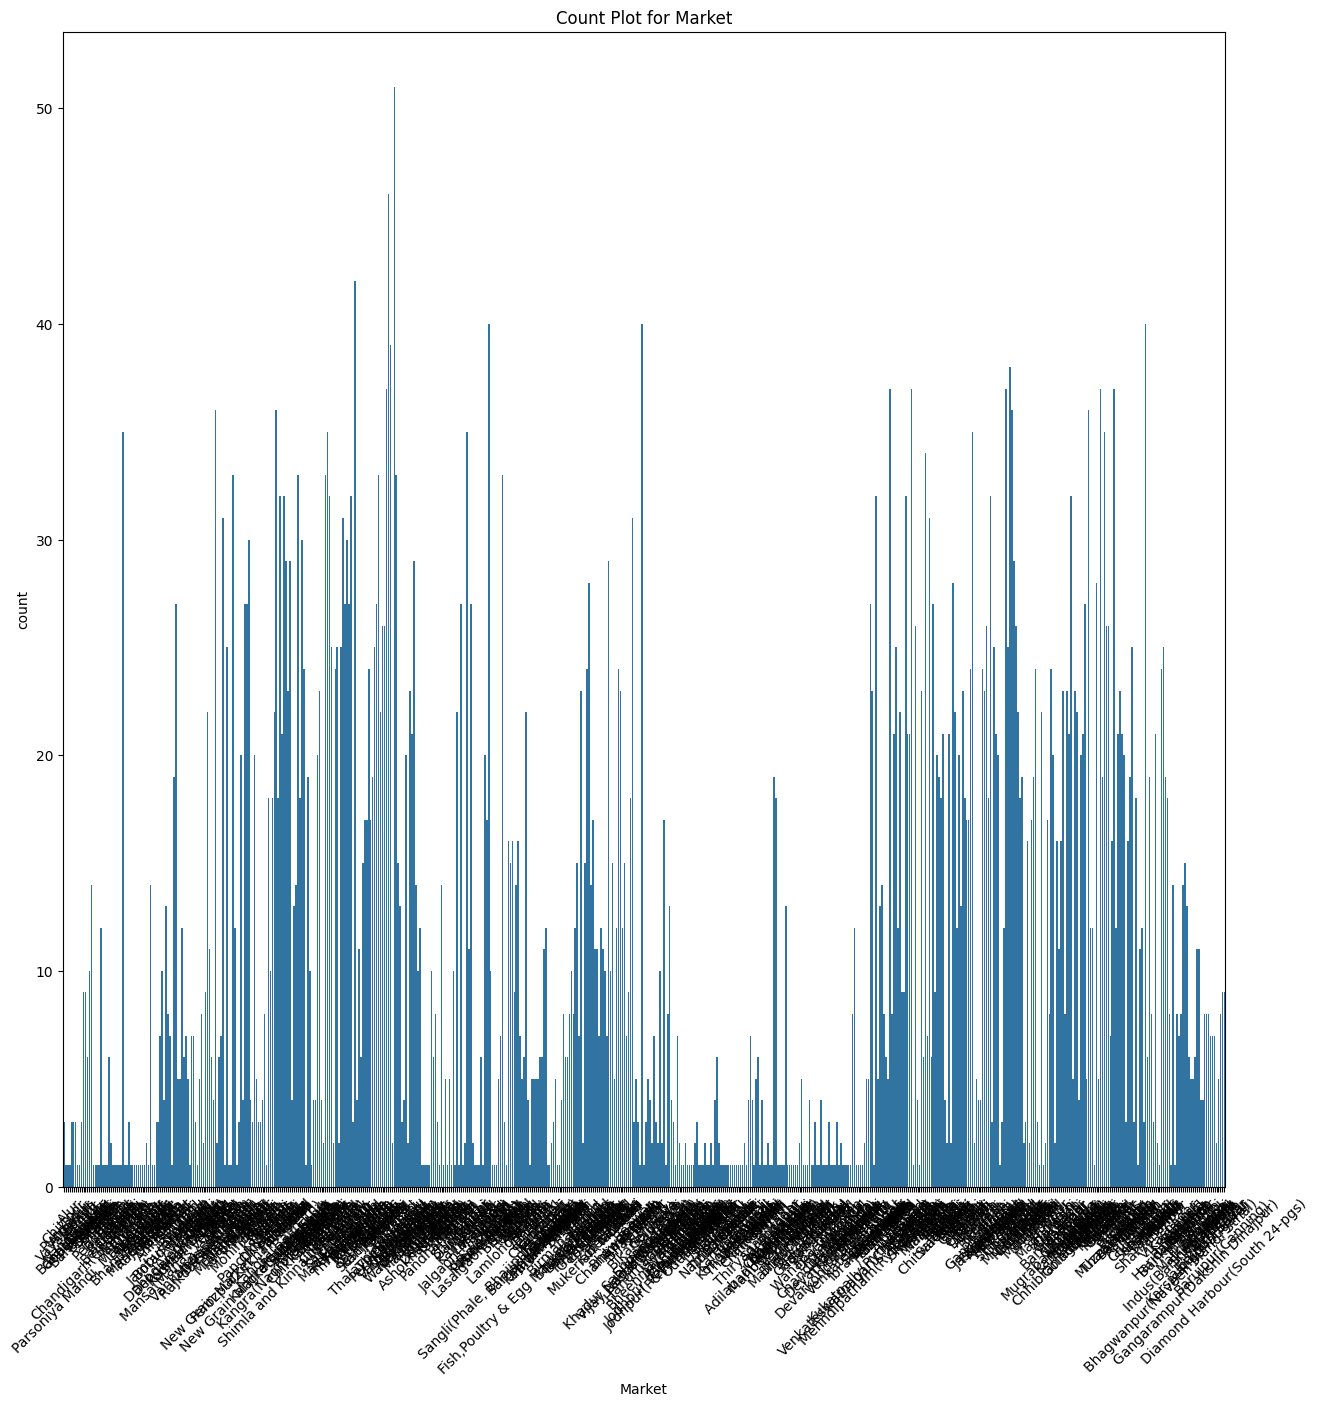

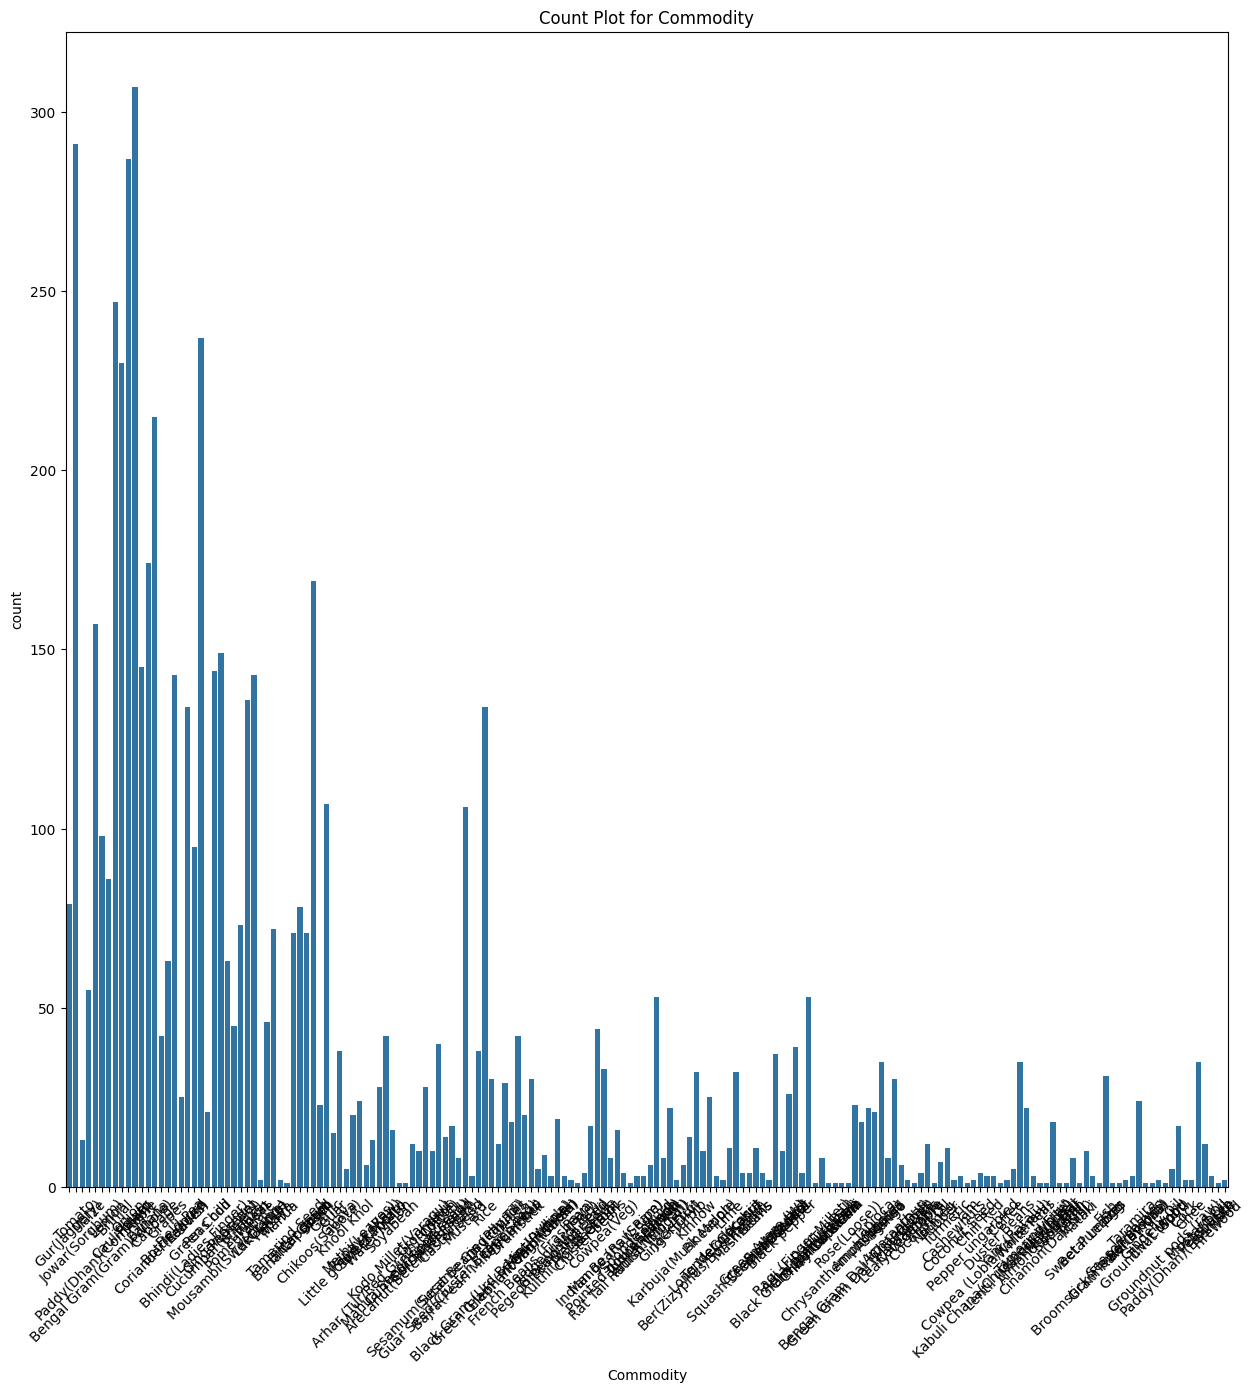

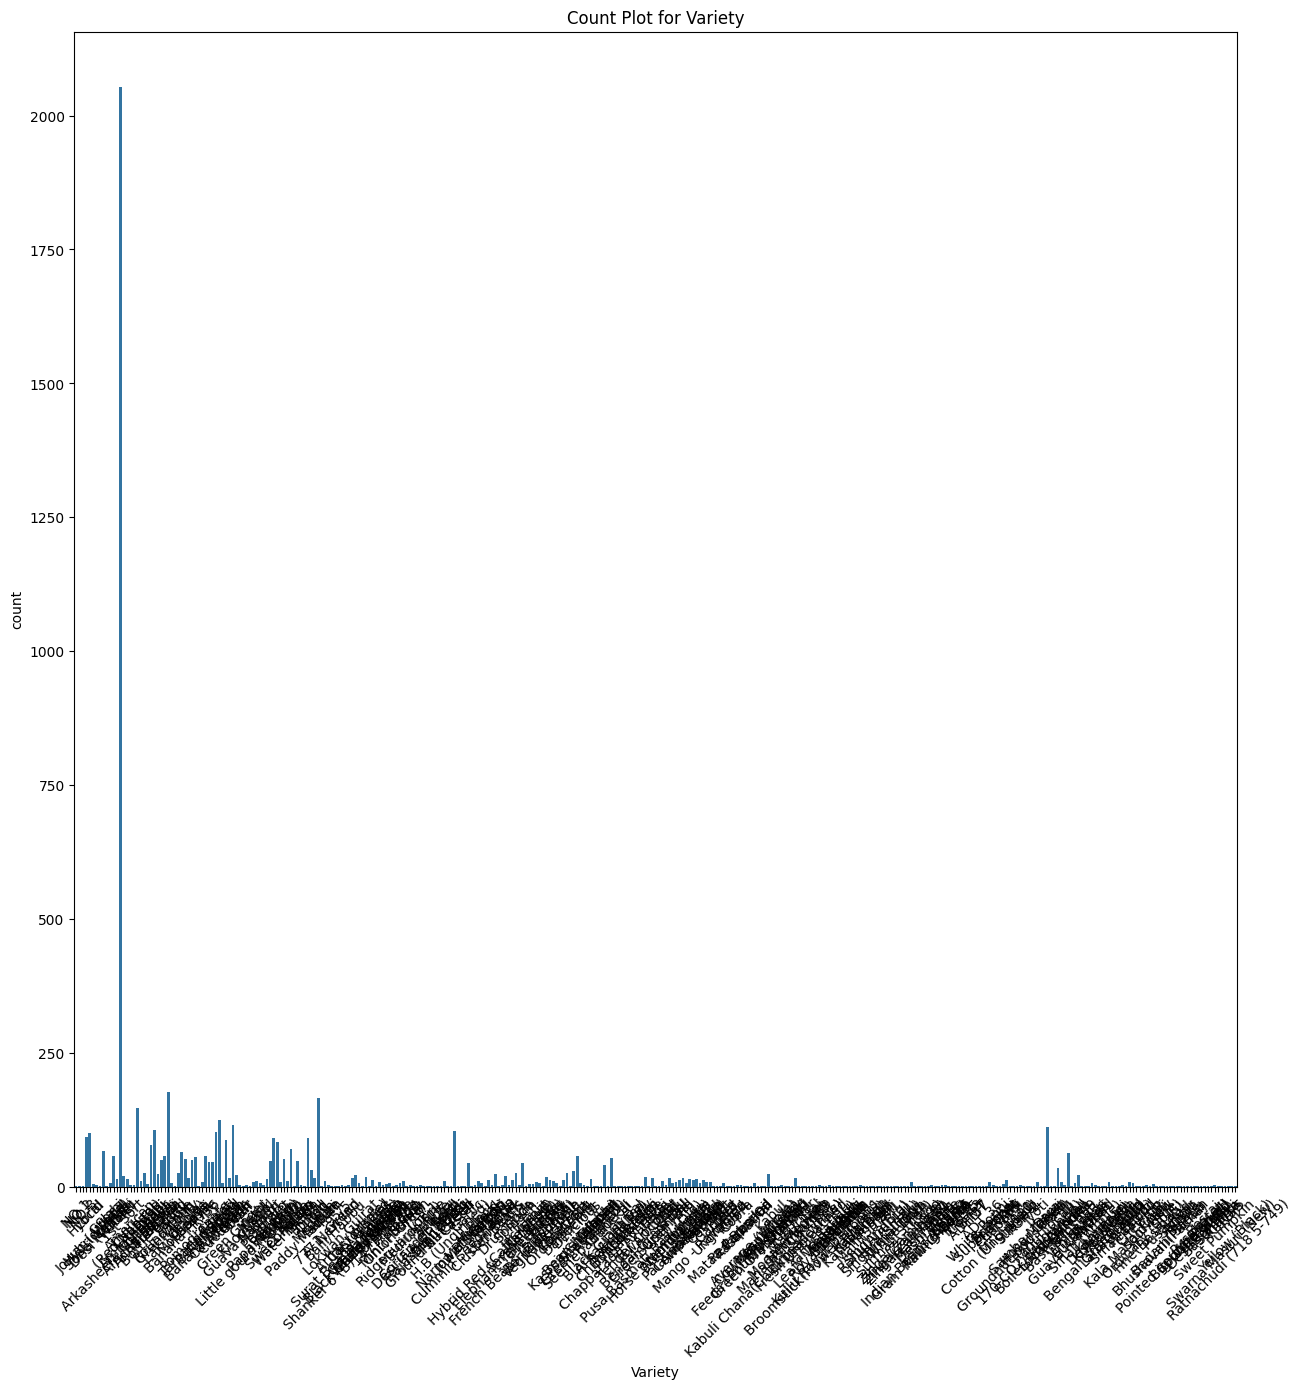

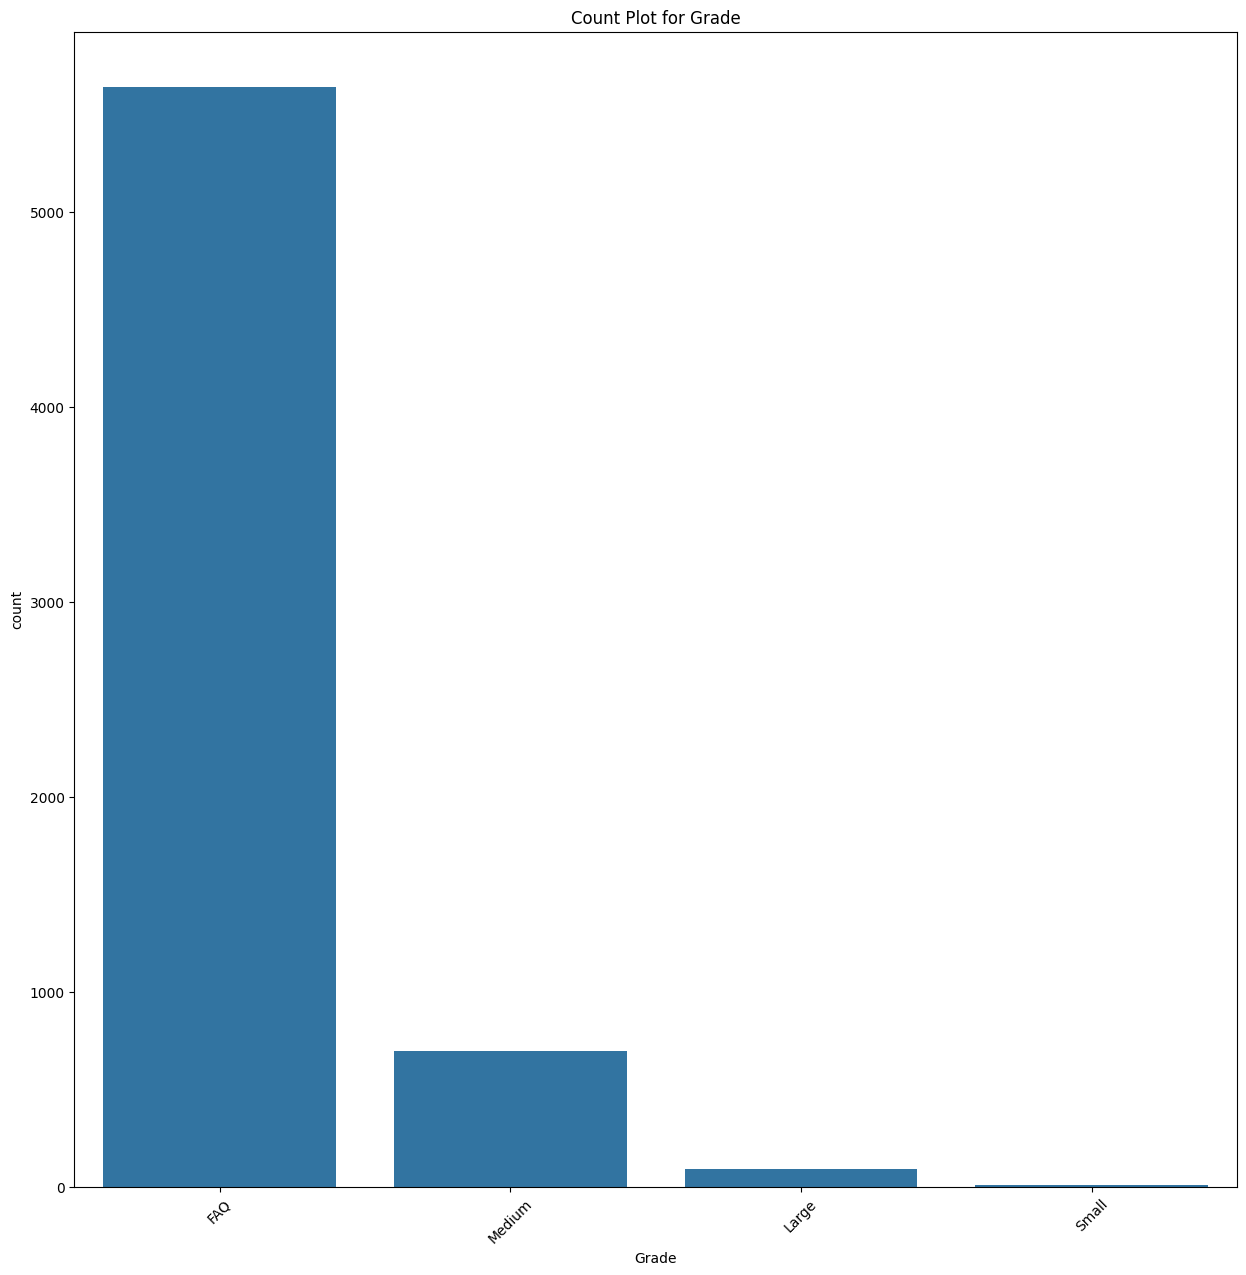

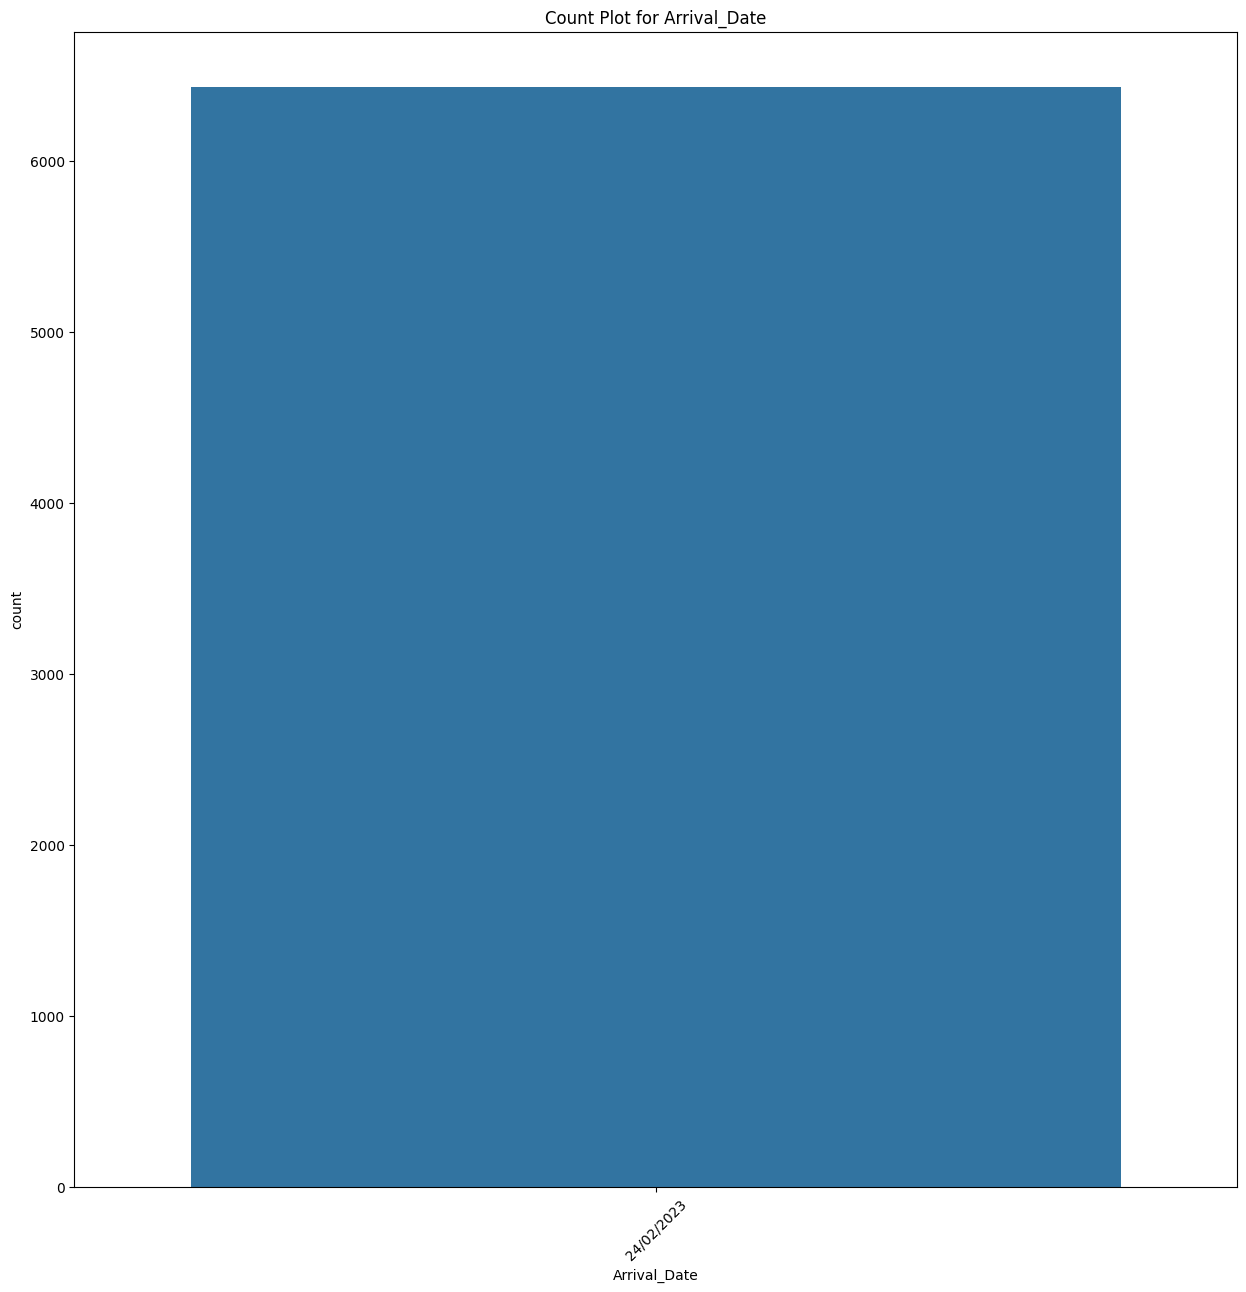

In [ ]:
for i in obj:
    plt.figure(figsize=(15,15))  # Adjust size for better readability
    sns.countplot(x=i, data=df)  # Use the column name directly
    plt.title(f'Count Plot for {i}')  # Add a title
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability if needed
    plt.show()  # Show the plot

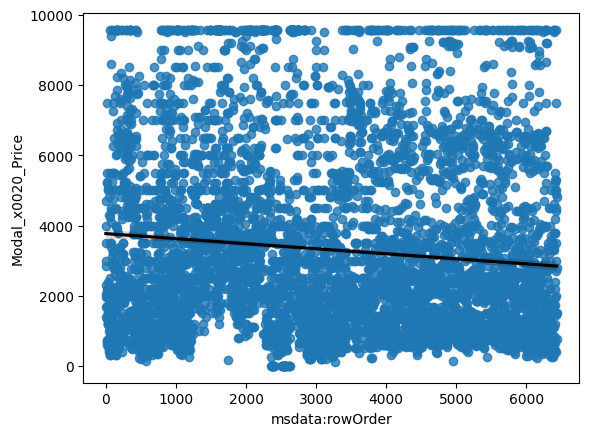

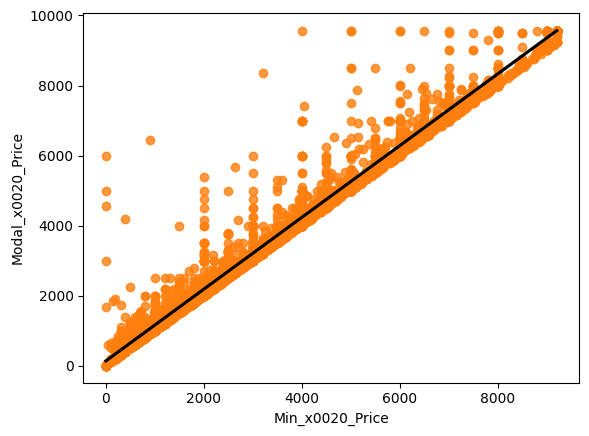

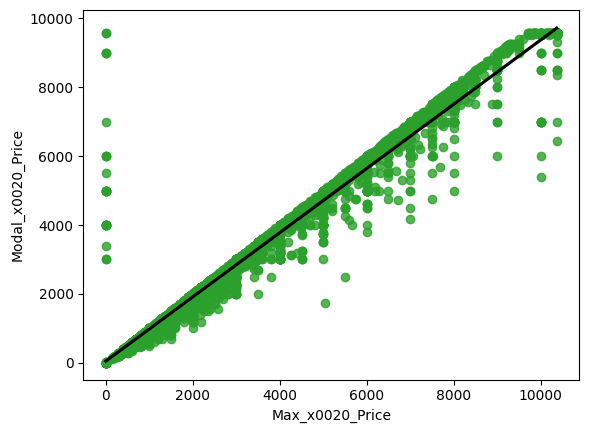

In [ ]:
custom_palette = sns.color_palette(n_colors=18)

j=0
for i in x:
  if i not in obj:
    sns.regplot(x=x[i],y=y,color=custom_palette[j],line_kws={'color':'k'})
    j+=1
    plt.show()

# This code uses Seaborn and Matplotlib to create regression plots for a subset of columns from a DataFrame (x) against a target variable (y). Let’s break it down step by step:

# 1. custom_palette = sns.color_palette(n_colors=18)
# sns.color_palette(n_colors=18): Creates a custom color palette with 18 distinct colors. These colors will be used for plotting the regression lines.
# 2. j=0
# Initializes a counter j to keep track of the current color in the palette for each regression plot.
# 3. for i in x:
# Iterates through all columns in the DataFrame x. Here, x likely refers to a DataFrame or dictionary-like object containing features.
# 4. if i not in obj:
# Filters out specific columns: Checks if the current column i is not present in obj.
# obj likely represents a list of categorical or non-numeric columns, so this condition ensures that only numeric columns (suitable for regression plots) are processed.
# 5. Regression Plot
# python
# Copy code
# sns.regplot(x=x[i], y=y, color=custom_palette[j], line_kws={'color': 'k'})
# sns.regplot: Plots a scatterplot of x[i] vs. y with a regression line.
# x=x[i]: Uses the values in column i of x as the independent variable.
# y=y: Uses the target variable y as the dependent variable.
# color=custom_palette[j]: Sets the scatterplot color to the jth color from the custom_palette.
# line_kws={'color': 'k'}: Customizes the regression line to use the color black ('k').
# 6. j += 1
# Increments the color index j to use the next color in the palette for the next plot.
# 7. plt.show()
# Displays the current regression plot. Each plot is shown individually to ensure they don't overlap.
# How the Code Works in Sequence
# For each column i in x:
# If i is not in obj (i.e., it is numeric):
# Create a scatterplot and regression line between x[i] and y.
# Use a unique color for the scatterplot from the custom_palette.
# Show each plot individually using plt.show().


In [ ]:
df.drop(['diffgr:id', 'msdata:rowOrder','Arrival_Date'],axis=1,inplace=True)

In [ ]:
encoder=LabelEncoder()
for i in obj:
  x[i]=encoder.fit_transform(x[i])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
model=DecisionTreeRegressor(criterion='squared_error')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([9568.75,  700.  , 1000.  , ..., 2700.  , 6725.  , 1639.  ])

In [ ]:
error = pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred,'Error':y_test-y_pred})
error

,Actual Value,Predicted value,Error
2436,9568.75,9568.75,0.0
3361,700.00,700.00,0.0
233,1200.00,1000.00,200.0
3667,1600.00,1600.00,0.0
5011,9568.75,9568.75,0.0
...,...,...,...
1465,3000.00,3000.00,0.0
6270,2060.00,2060.00,0.0
4522,2670.00,2700.00,-30.0
219,6600.00,6725.00,-125.0


In [ ]:
print('MAE = ',mean_absolute_error(y_test,y_pred))
print('MAPE = ',mean_absolute_percentage_error(y_test,y_pred))
print('MSE = ',mean_squared_error(y_test,y_pred))
print('RMSE = ',root_mean_squared_error(y_test,y_pred))
print('r2_score = ',r2_score(y_test,y_pred))

MAE =  60.52982910409115
MAPE =  0.023974756742377992
MSE =  39563.46283531849
RMSE =  198.905663155473
r2_score =  0.9937113733098595
